In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

In [4]:
df = pd.read_csv("radiomics_features.csv")
df.head()

,ID,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,benign (1),3.1.1.dev111+g8ed579383,2.2.6,2.5.3,1.8.0,3.10.15,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},b75398d30def14870daaa168e56cbc7789e352d0,2D,...,18.737043,0.250762,0.015638,0.059502,0.004672,0.158966,1.575063,0.001290,1.686396e-06,1.223598
1,benign (2),3.1.1.dev111+g8ed579383,2.2.6,2.5.3,1.8.0,3.10.15,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},2bbdb00f7b8c34147af0b4ea299017b66842b066,2D,...,19.762175,0.250080,0.013141,0.052246,0.003365,0.250040,1.000000,0.000213,2.270951e-08,1.000000
2,benign (3),3.1.1.dev111+g8ed579383,2.2.6,2.5.3,1.8.0,3.10.15,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},0436de8220841b51ba2de6f8a868fc92dd66e26b,2D,...,10.329106,0.161324,0.034068,0.609093,0.004476,8.258848,0.003990,6.074451,6.446788e-03,0.197906
3,benign (4),3.1.1.dev111+g8ed579383,2.2.6,2.5.3,1.8.0,3.10.15,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},fb85e2002121a80c0f81082f895fbd29ea1c5032,2D,...,19.259829,0.250000,0.013890,0.055561,0.003473,0.000000,1000000.000000,0.000000,0.000000e+00,0.000000
4,benign (5),3.1.1.dev111+g8ed579383,2.2.6,2.5.3,1.8.0,3.10.15,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},a71dd4a2796a34dd5213f1820e797dc597467c76,2D,...,19.512027,0.250220,0.013723,0.054013,0.003651,0.250110,1.000000,0.000587,1.720476e-07,1.000000


In [7]:
df["label"] = df["ID"].apply(lambda x: 0 if "benign" in x.lower() else 1)

# Remove diagnostic columns-Radiomics generates many "diagnostics_" columns that contain metadata, not features
df = df.loc[:, ~df.columns.str.startswith("diagnostics_")]

# Prepare X and y
y = df["label"] # target variable x and y
X = df.drop(columns=["ID", "label"]) # all radiomics features.

Running LASSO for feature selection...
Original feature count: 102
Selected feature count: 28
Selected features: ['original_shape2D_Elongation', 'original_shape2D_MajorAxisLength', 'original_shape2D_MinorAxisLength', 'original_shape2D_Sphericity', 'original_firstorder_Energy', 'original_firstorder_Kurtosis', 'original_firstorder_Range', 'original_firstorder_RobustMeanAbsoluteDeviation', 'original_firstorder_Skewness', 'original_firstorder_TotalEnergy', 'original_glcm_ClusterShade', 'original_glcm_DifferenceVariance', 'original_glcm_Imc2', 'original_glrlm_GrayLevelNonUniformity', 'original_glrlm_LongRunLowGrayLevelEmphasis', 'original_glrlm_RunEntropy', 'original_glszm_GrayLevelNonUniformity', 'original_glszm_LargeAreaEmphasis', 'original_glszm_LargeAreaHighGrayLevelEmphasis', 'original_glszm_SmallAreaEmphasis', 'original_glszm_SmallAreaHighGrayLevelEmphasis', 'original_glszm_SmallAreaLowGrayLevelEmphasis', 'original_glszm_ZonePercentage', 'original_glszm_ZoneVariance', 'original_gldm_L

/Users/abby/miniforge3/envs/radiomics/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/abby/miniforge3/envs/radiomics/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


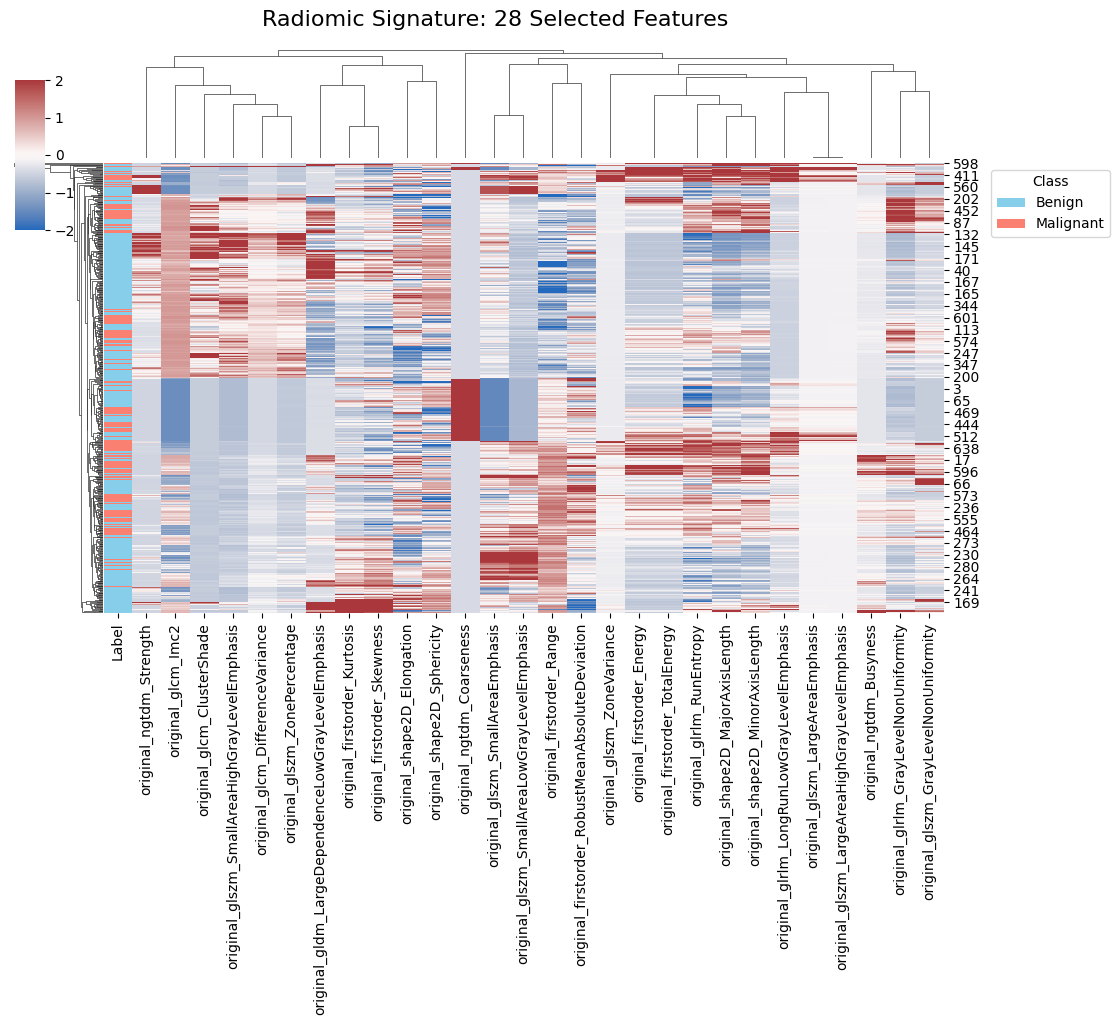

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split


TARGET_COL = 'label' 

# ---------------------------------------------------------
# 2. PREPROCESSING (Crucial for LASSO)
# ---------------------------------------------------------
# LASSO requires features to be on the same scale (Z-score normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# ---------------------------------------------------------
# 3. FEATURE SELECTION: LASSO
# ---------------------------------------------------------
print("Running LASSO for feature selection...")

# LassoCV automatically finds the best alpha (regularization strength) using cross-validation
lasso = LassoCV(cv=5, random_state=42, max_iter=10000)
lasso.fit(X_scaled, y)

# Get coefficients
coefs = pd.Series(lasso.coef_, index=X.columns)

# Filter for non-zero coefficients (the selected features)
selected_features = coefs[coefs != 0].index.tolist()
print(f"Original feature count: {X.shape[1]}")
print(f"Selected feature count: {len(selected_features)}")
print("Selected features:", selected_features)

if len(selected_features) == 0:
    print("⚠️ LASSO shrank all coefficients to zero. Try reducing alpha or checking data quality.")
    exit()

# ---------------------------------------------------------
# 4. VISUALIZATION: The "Clustergram"
# ---------------------------------------------------------
# We only plot the selected features to see how well they separate the groups
plot_data = X_scaled_df[selected_features].copy()
plot_data['Label'] = y.map({0: 'Benign', 1: 'Malignant'})  # Map for color coding

# Create a color palette for the row colors (Classes)
row_colors = plot_data['Label'].map({'Benign': 'skyblue', 'Malignant': 'salmon'})

print("Generating figure...")
# Clustermap: Hierarchical clustering of both features and samples
# standard_scale=1 normalizes columns for clearer color contrast
g = sns.clustermap(
    plot_data.drop(columns=['Label']),
    row_colors=row_colors,
    cmap="vlag",            # Red-Blue diverging colormap
    center=0,               # Center the colormap at 0
    vmin=-2, vmax=2,
    col_cluster=True,       # Cluster similar features
    row_cluster=True,       # Cluster similar patients
    figsize=(10, 10),
    dendrogram_ratio=(.1, .2),
    cbar_pos=(0.02, 0.8, 0.03, 0.15)
)

# Adjust layout
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize=10)
g.fig.suptitle(f'Radiomic Signature: {len(selected_features)} Selected Features', y=1.02, fontsize=16)

# Add a legend for the row colors manually (a bit tricky in clustermap)
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='skyblue', label='Benign'),
    Patch(facecolor='salmon', label='Malignant')
]
g.ax_heatmap.legend(
    handles=legend_elements, 
    loc="upper left", 
    bbox_to_anchor=(1.05, 1), 
    title="Class"
)

plt.show()

Computing LASSO path...
Running Cross-Validation to find optimal alpha...


/Users/abby/miniforge3/envs/radiomics/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.065e-02, tolerance: 2.080e-02
  model = cd_fast.enet_coordinate_descent_gram(
/Users/abby/miniforge3/envs/radiomics/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.868e-02, tolerance: 2.080e-02
  model = cd_fast.enet_coordinate_descent_gram(
/Users/abby/miniforge3/envs/radiomics/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of th

Optimal Alpha (Lambda): 0.0037088987438588425
Features selected: 30


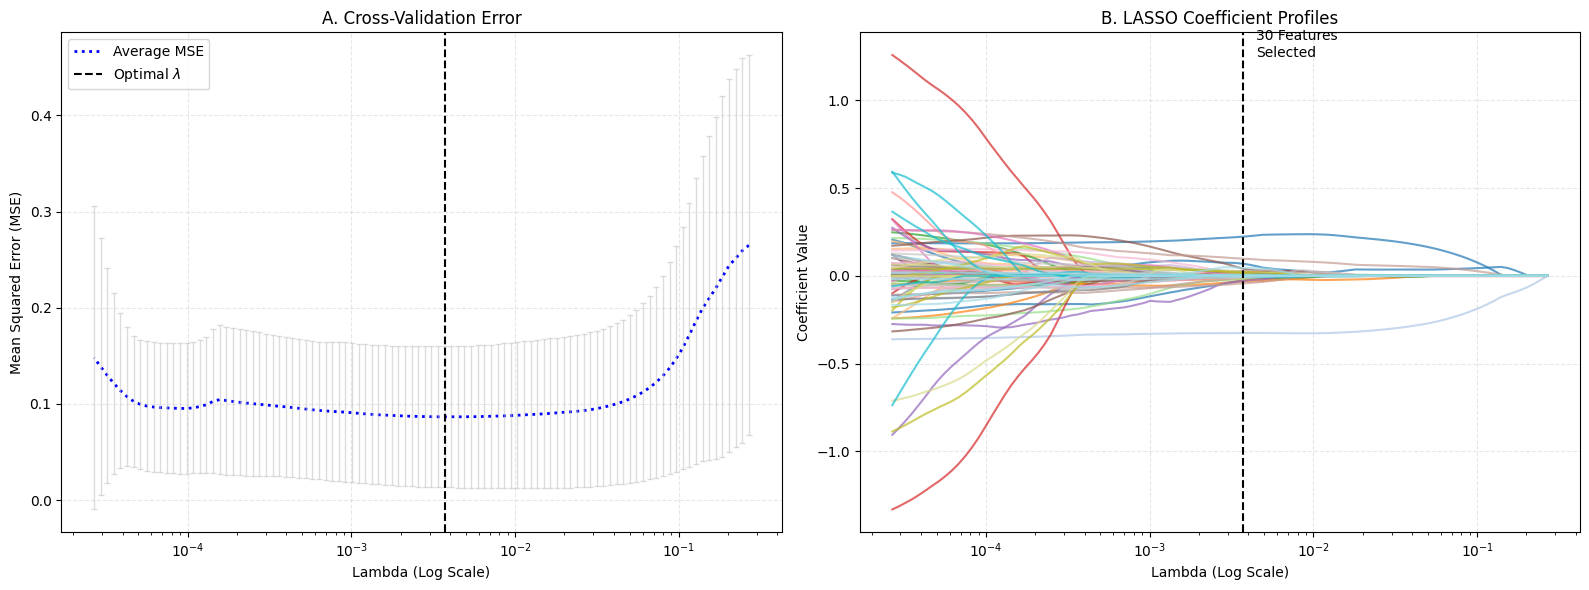

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, lasso_path

X_numeric = X.select_dtypes(include=[np.number])

# Standardize (Crucial for LASSO)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# ---------------------------------------------------------
# 2. CALCULATE LASSO PATH (Right Plot Data)
# ---------------------------------------------------------
print("Computing LASSO path...")
# This calculates the coefficients for a wide range of alphas
alphas_path, coefs_path, _ = lasso_path(X_scaled, y, eps=0.0001, n_alphas=100)

# ---------------------------------------------------------
# 3. RUN CROSS-VALIDATION (Left Plot Data)
# ---------------------------------------------------------
print("Running Cross-Validation to find optimal alpha...")
# We use 10-fold CV to match the style of your screenshot
model = LassoCV(cv=10, eps=0.0001, random_state=42, max_iter=10000).fit(X_scaled, y)

# Get the MSE (Mean Squared Error) for each alpha
mse_mean = np.mean(model.mse_path_, axis=1)
mse_std = np.std(model.mse_path_, axis=1)

# Optimal Alpha (The dashed line)
optimal_alpha = model.alpha_
print(f"Optimal Alpha (Lambda): {optimal_alpha}")
print(f"Features selected: {np.sum(model.coef_ != 0)}")

# ---------------------------------------------------------
# 4. PLOTTING
# ---------------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# --- PLOT A: Cross-Validation Error (Left) ---
# We plot log(alpha) on X axis
ax[0].semilogx(model.alphas_, mse_mean, linestyle=':', color='blue', linewidth=2, label='Average MSE')

# Add error bars (vertical lines) similar to the screenshot
ax[0].errorbar(model.alphas_, mse_mean, yerr=mse_std, fmt='none', ecolor='#BBBBBB', elinewidth=1, capsize=2, alpha=0.5)

# Vertical line for optimal alpha
ax[0].axvline(optimal_alpha, linestyle='--', color='black', label='Optimal $\lambda$')

ax[0].set_xlabel('Lambda (Log Scale)')
ax[0].set_ylabel('Mean Squared Error (MSE)')
ax[0].set_title('A. Cross-Validation Error')
ax[0].legend()
ax[0].grid(True, linestyle='--', alpha=0.3)


# --- PLOT B: Coefficient Profiles (Right) ---
# Each line is one feature
colors = plt.cm.tab20(np.linspace(0, 1, len(X_numeric.columns)))

for i in range(coefs_path.shape[0]):
    ax[1].semilogx(alphas_path, coefs_path[i, :], color=colors[i], linewidth=1.5, alpha=0.7)

# Vertical line for optimal alpha
ax[1].axvline(optimal_alpha, linestyle='--', color='black', label='Optimal $\lambda$')

ax[1].set_xlabel('Lambda (Log Scale)')
ax[1].set_ylabel('Coefficient Value')
ax[1].set_title('B. LASSO Coefficient Profiles')
ax[1].grid(True, linestyle='--', alpha=0.3)

# Optional: Add text showing how many features survive at the line
n_features = np.sum(model.coef_ != 0)
ax[1].text(optimal_alpha * 1.2, ax[1].get_ylim()[1]*0.9, f'{n_features} Features\nSelected', fontsize=10)

plt.tight_layout()
plt.show()

✅ Final AUC Score: 0.980


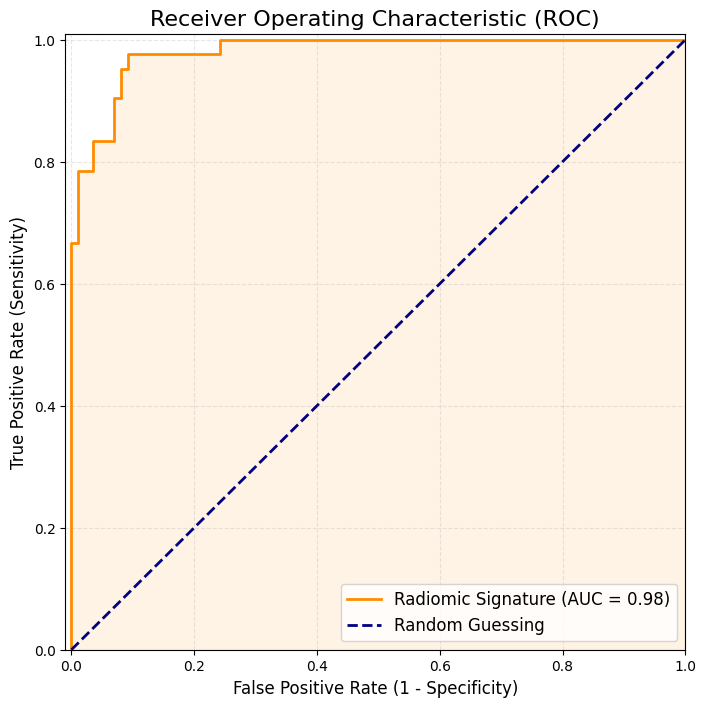

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# ---------------------------------------------------------
# 1. PREPARE DATA (Using the features selected by LASSO)
# ---------------------------------------------------------
# Ensure 'selected_features' is defined from your previous LASSO run
if 'selected_features' not in locals():
    print("⚠️ Please run the LASSO script first to generate 'selected_features'")
    # Fallback for testing:
    # selected_features = X_numeric.columns[:5] 

X_final = X_numeric[selected_features] # Use ONLY the winners
y_final = y

# Standardize again (just for safety)
X_final_scaled = StandardScaler().fit_transform(X_final)

# Split into Train (80%) and Test (20%)
# We test on data the model has NEVER seen to get a fair accuracy score
X_train, X_test, y_train, y_test = train_test_split(
    X_final_scaled, y_final, test_size=0.2, random_state=42, stratify=y_final
)

# ---------------------------------------------------------
# 2. TRAIN CLASSIFIER
# ---------------------------------------------------------
# We use Logistic Regression on the selected features
model = LogisticRegression()
model.fit(X_train, y_train)

# Get probability scores (Confidence that it is Malignant)
y_score = model.predict_proba(X_test)[:, 1]

# ---------------------------------------------------------
# 3. GENERATE ROC CURVE
# ---------------------------------------------------------
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

print(f"✅ Final AUC Score: {roc_auc:.3f}")

# ---------------------------------------------------------
# 4. PLOT
# ---------------------------------------------------------
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Radiomic Signature (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Optional: Fill area under curve
plt.fill_between(fpr, tpr, color='darkorange', alpha=0.1)

plt.show()